In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
job= pd.read_csv('data job posts.csv')

In [5]:
job.head(2)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False


In [6]:
job.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [7]:
job.shape

(19001, 24)

In [8]:
Online_Job = job[['jobpost','Title','JobDescription', 'JobRequirment','RequiredQual','Year', 'Month', 'IT']]

In [9]:
Online_Job.shape

(19001, 8)

In [10]:
Online_Job.drop_duplicates(subset=['jobpost', 'Title'], keep=False,inplace=True)

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
Online_Job.shape

(18819, 8)

In [13]:
Online_Job.isnull().sum()

jobpost              0
Title               26
JobDescription    3810
JobRequirment     2440
RequiredQual       420
Year                 0
Month                0
IT                   0
dtype: int64

In [14]:
Online_Job.head(2)

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",2004,1,False
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,2004,1,False


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kunnu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [18]:
Online_Job['length'] = Online_Job['jobpost'].apply(lambda x: len([x for x in x.split()]))
Online_Job[['jobpost','length']].head()

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,jobpost,length
0,AMERIA Investment Consulting Company\nJOB TITL...,840
1,International Research & Exchanges Board (IREX...,368
2,Caucasus Environmental NGO Network (CENN)\nJOB...,301
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,591
4,Yerevan Brandy Company\nJOB TITLE: Software D...,204


In [19]:
## Removing Punctuation
Online_Job['jobpost1'] = Online_Job['jobpost'].str.replace('[^\w\s]','')
Online_Job['Title1'] = Online_Job['Title'].str.replace('[^\w\s]','')
Online_Job['JobDescription1'] = Online_Job['JobDescription'].str.replace('[^\w\s]','')
Online_Job['JobRequirment1'] = Online_Job['JobRequirment'].str.replace('[^\w\s]','')
Online_Job['RequiredQual1'] = Online_Job['RequiredQual'].str.replace('[^\w\s]','')
Online_Job.head(2)

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,Year,Month,IT,length,jobpost1,Title1,JobDescription1,JobRequirment1,RequiredQual1
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",2004,1,False,840,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,Supervises financial management and administr...,To perform this job successfully an\nindividua...
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,2004,1,False,368,International Research Exchanges Board IREX\n...,Fulltime Community Connections Intern paid int...,NaN,NaN,Bachelors Degree Masters is preferred\n Excel...


In [20]:
Online_Job.columns

Index(['jobpost', 'Title', 'JobDescription', 'JobRequirment', 'RequiredQual',
       'Year', 'Month', 'IT', 'length', 'jobpost1', 'Title1',
       'JobDescription1', 'JobRequirment1', 'RequiredQual1'],
      dtype='object')

In [21]:
Online_Job['jobpost3'] = Online_Job['jobpost1'].apply(lambda x: x.replace('\n',' '))

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
Online_Job.isnull().sum()

jobpost               0
Title                26
JobDescription     3810
JobRequirment      2440
RequiredQual        420
Year                  0
Month                 0
IT                    0
length                0
jobpost1              0
Title1               26
JobDescription1    3810
JobRequirment1     2440
RequiredQual1       420
jobpost3              0
dtype: int64

In [23]:
Online_Job.dropna(inplace=True)

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
Online_Job.shape

(13042, 15)

In [25]:
# keeping those words which have only alphabets 
Online_Job['jobpost3'] = Online_Job['jobpost1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['Title3'] = Online_Job['Title1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['JobDescription3'] = Online_Job['JobDescription1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['JobRequirment3'] = Online_Job['JobRequirment1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))
Online_Job['RequiredQual3'] = Online_Job['RequiredQual1'].apply(lambda x: ' '.join(x for x in x.split() if x.isalpha()))


C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [26]:
Online_Job.head(2)

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,Year,Month,IT,length,jobpost1,Title1,JobDescription1,JobRequirment1,RequiredQual1,jobpost3,Title3,JobDescription3,JobRequirment3,RequiredQual3
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",2004,1,False,840,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,Supervises financial management and administr...,To perform this job successfully an\nindividua...,AMERIA Investment Consulting Company JOB TITLE...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,Supervises financial management and administra...,To perform this job successfully an individual...
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",2004,1,False,301,Caucasus Environmental NGO Network CENN\nJOB T...,Country Coordinator,Public outreach and strengthening of a growing...,Working with the Country Director to provide ...,Degree in environmentally related field or 5 ...,Caucasus Environmental NGO Network CENN JOB TI...,Country Coordinator,Public outreach and strengthening of a growing...,Working with the Country Director to provide e...,Degree in environmentally related field or yea...


In [27]:
### Removing stop words
stop = stopwords.words('english')
Online_Job['jobpost4'] = Online_Job['jobpost3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['Title4'] = Online_Job['Title3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['JobDescription4'] = Online_Job['JobDescription3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['JobRequirment4'] = Online_Job['JobRequirment3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_Job['RequiredQual4'] = Online_Job['RequiredQual3'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [28]:
Online_Job.head(1)

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,Year,Month,IT,length,jobpost1,...,jobpost3,Title3,JobDescription3,JobRequirment3,RequiredQual3,jobpost4,Title4,JobDescription4,JobRequirment4,RequiredQual4
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",2004,1,False,840,AMERIA Investment Consulting Company\nJOB TITL...,...,AMERIA Investment Consulting Company JOB TITLE...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,Supervises financial management and administra...,To perform this job successfully an individual...,AMERIA Investment Consulting Company JOB TITLE...,Chief Financial Officer,AMERIA Investment Consulting Company seeking C...,Supervises financial management administrative...,To perform job successfully individual must ab...


In [29]:
# coverting all cloumns to lower case
Online_Job['jobpost5']          = Online_Job['jobpost4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['Title5']            = Online_Job['Title4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['JobDescription5']   = Online_Job['JobDescription4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['JobRequirment5']    = Online_Job['JobRequirment4'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Online_Job['RequiredQual5']     = Online_Job['RequiredQual4'].apply(lambda x: " ".join(x.lower() for x in x.split()))


C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [30]:
Online_Job.head(1)

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,Year,Month,IT,length,jobpost1,...,jobpost4,Title4,JobDescription4,JobRequirment4,RequiredQual4,jobpost5,Title5,JobDescription5,JobRequirment5,RequiredQual5
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",2004,1,False,840,AMERIA Investment Consulting Company\nJOB TITL...,...,AMERIA Investment Consulting Company JOB TITLE...,Chief Financial Officer,AMERIA Investment Consulting Company seeking C...,Supervises financial management administrative...,To perform job successfully individual must ab...,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company seeking c...,supervises financial management administrative...,to perform job successfully individual must ab...


In [31]:
Online_Job.columns

Index(['jobpost', 'Title', 'JobDescription', 'JobRequirment', 'RequiredQual',
       'Year', 'Month', 'IT', 'length', 'jobpost1', 'Title1',
       'JobDescription1', 'JobRequirment1', 'RequiredQual1', 'jobpost3',
       'Title3', 'JobDescription3', 'JobRequirment3', 'RequiredQual3',
       'jobpost4', 'Title4', 'JobDescription4', 'JobRequirment4',
       'RequiredQual4', 'jobpost5', 'Title5', 'JobDescription5',
       'JobRequirment5', 'RequiredQual5'],
      dtype='object')

In [32]:
# Jobpost , Title , Jobrequirement , Jobdescription , RequiredQual , Aboutc , IT , Year

In [33]:
Online_job_Token = pd.DataFrame()
Online_job_Token = Online_Job[['jobpost5', 'Title5','JobDescription5', 'JobRequirment5', 'RequiredQual5','Year','IT']]

In [34]:
Online_job_Token.head(2)

,jobpost5,Title5,JobDescription5,JobRequirment5,RequiredQual5,Year,IT
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company seeking c...,supervises financial management administrative...,to perform job successfully individual must ab...,2004,False
2,caucasus environmental ngo network cenn job ti...,country coordinator,public outreach strengthening growing network ...,working country director provide environmental...,degree environmentally related field years rel...,2004,False


In [35]:
Online_job_Token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13042 entries, 0 to 19000
Data columns (total 7 columns):
jobpost5           13042 non-null object
Title5             13042 non-null object
JobDescription5    13042 non-null object
JobRequirment5     13042 non-null object
RequiredQual5      13042 non-null object
Year               13042 non-null int64
IT                 13042 non-null bool
dtypes: bool(1), int64(1), object(5)
memory usage: 726.0+ KB


In [36]:
## Converting IT into numeric form
Online_job_Token['IT_new'] = np.where(Online_job_Token['IT']== False, 1, 0)


C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
# Converting Year to String
Online_job_Token['Year'] = Online_job_Token.Year.astype(str)

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
Online_job_Token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13042 entries, 0 to 19000
Data columns (total 8 columns):
jobpost5           13042 non-null object
Title5             13042 non-null object
JobDescription5    13042 non-null object
JobRequirment5     13042 non-null object
RequiredQual5      13042 non-null object
Year               13042 non-null object
IT                 13042 non-null bool
IT_new             13042 non-null int32
dtypes: bool(1), int32(1), object(6)
memory usage: 776.9+ KB


In [39]:
Online_job_Token.head(2)

,jobpost5,Title5,JobDescription5,JobRequirment5,RequiredQual5,Year,IT,IT_new
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company seeking c...,supervises financial management administrative...,to perform job successfully individual must ab...,2004,False,1
2,caucasus environmental ngo network cenn job ti...,country coordinator,public outreach strengthening growing network ...,working country director provide environmental...,degree environmentally related field years rel...,2004,False,1


In [40]:
Online_job_Token.columns

Index(['jobpost5', 'Title5', 'JobDescription5', 'JobRequirment5',
       'RequiredQual5', 'Year', 'IT', 'IT_new'],
      dtype='object')

In [42]:
# Combining all columns into one column -> col_all

Online_job_Token["col_all"] = Online_job_Token["jobpost5"].map(str) + " " + Online_job_Token["Title5"] + " " + Online_job_Token["JobDescription5"] + " " + Online_job_Token["JobRequirment5"] + " " + Online_job_Token["RequiredQual5"] + " " + Online_job_Token["Year"]

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
Online_job_Token.reset_index(drop=True,inplace=True)

In [44]:
Online_job_Token.head(2)

,jobpost5,Title5,JobDescription5,JobRequirment5,RequiredQual5,Year,IT,IT_new,col_all
0,ameria investment consulting company job title...,chief financial officer,ameria investment consulting company seeking c...,supervises financial management administrative...,to perform job successfully individual must ab...,2004,False,1,ameria investment consulting company job title...
1,caucasus environmental ngo network cenn job ti...,country coordinator,public outreach strengthening growing network ...,working country director provide environmental...,degree environmentally related field years rel...,2004,False,1,caucasus environmental ngo network cenn job ti...


In [45]:
Online_job_Token.col_all.head(2)

0    ameria investment consulting company job title...
1    caucasus environmental ngo network cenn job ti...
Name: col_all, dtype: object

In [46]:
# define X and y
X = Online_job_Token.col_all
y = Online_job_Token.IT_new

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
type(X)

pandas.core.series.Series

## Lematization 

In [49]:
from textblob import Word
Online_job_Token['col_all'] = Online_job_Token['col_all'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Online_job_Token['col_all'].head()

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    ameria investment consulting company job title...
1    caucasus environmental ngo network cenn job ti...
2    manoff group job title bcc specialist position...
3    food security regional cooperation stability p...
4    united nation development programme armenia jo...
Name: col_all, dtype: object

## Stop Words Removal

In [50]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [51]:
stop.extend(('knowledge',
'experience',
'job',
'skills',
'work',
'applicaton',
'ability',
'armenia',
'please',
'website',
'mention',
'the',
'english',
'wwwcareercenteram',
'company',
'team',
'excellent',
'good',
'armenian',
'required',
'organization',
'date',
'to',
'responsible',
'office',
'years',
'communication',
'yeveran',
'time',
'ensure',
'provide',
'letter',
'develop',
'related',
'activities',
'center',
'languages',
'responsibilites',
'degree',
'candidates',
'title'))

In [52]:
Online_job_Token['col_all'] = Online_job_Token['col_all'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Online_job_Token['col_all'].head(1)

C:\Users\Kunnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    ameria investment consulting chief financial o...
Name: col_all, dtype: object

In [53]:
# define X and y
X = Online_job_Token.col_all
y = Online_job_Token.IT_new

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Tokenization 

In [54]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [55]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [56]:
X_train_dtm.shape

(9781, 23915)

In [57]:
X_test_dtm.shape

(3261, 23915)

In [58]:
# last 50 features
print(vect.get_feature_names()[-50:])

['zega', 'zeitun', 'zejtun', 'zend', 'zendesk', 'zendframework', 'zendyii', 'zenni', 'zeno', 'zenta', 'zenteq', 'zentex', 'zentexam', 'zeppeilin', 'zeppelin', 'zepto', 'zepzepyur', 'zero', 'zerobalance', 'zerobased', 'zflyers', 'zhanna', 'zhannayeghiazaryan', 'zhiguly', 'zhirayr', 'zhoravor', 'zigbeelike', 'zigzag', 'zillion', 'zip', 'zipped', 'zipzip', 'zminimum', 'zn', 'zod', 'zohrabian', 'zonal', 'zone', 'zoning', 'zoo', 'zoology', 'zoom', 'zooplankton', 'zoravar', 'zrhovhannisyan', 'zte', 'ztes', 'zugdidi', 'zusammenarbeit', 'zvartnots']


In [59]:
pd.set_option('display.max_colwidth', -1)

In [60]:
Online_job_Token.col_all.head(1)

0    ameria investment consulting chief financial officer position location yerevan description ameria investment consulting seeking chief financial officer position manages fiscal administrative function provides highly technically complex staff assistance executive director performed requires high level technical proficiency financial management investment management well management supervisory administrative skill responsibility supervises financial management administrative staff including assigning responsibility reviewing employee process product counseling employee giving performance evaluation recommending disciplinary action serf member management participating strategic operational planning directs oversees financial management activity including establishing monitoring internal control managing cash investment managing investment portfolio collaboration investment leader includes limited evaluation investment risk concentration risk fund deployment level adequacy loss liquid

In [61]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### Defining Functiom

In [62]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features Train: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    print('Features Test: ', X_test_dtm.shape[1])
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test1(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    print('Train Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    y_pred_class = nb.predict(X_test_dtm)
    print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [63]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(2,3), min_df=5)

In [64]:
# Predicting Whether Job is IT or NOn IT
tokenize_test1(vect)

Features:  123194
Train Accuracy:  0.9321132808506287
Test Accuracy:  0.922723091076357


In [65]:
Online_job_Token.columns

Index(['jobpost5', 'Title5', 'JobDescription5', 'JobRequirment5',
       'RequiredQual5', 'Year', 'IT', 'IT_new', 'col_all'],
      dtype='object')

### Decision Tree

In [68]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [69]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit( X_train_dtm, y_train )

In [70]:
pd.DataFrame(clf_tree.predict_proba(X_train_dtm)).head()

,0,1
0,0.052441,0.947559
1,0.052441,0.947559
2,0.052441,0.947559
3,0.052441,0.947559
4,0.940343,0.059657


In [71]:
tree_train_pred = pd.DataFrame( { 'actual':  y_train,
                            'predicted': clf_tree.predict( X_train_dtm ) } )
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test_dtm ) } )


In [72]:
tree_train_pred.head(10)

,actual,predicted
4592,1,1
6372,1,1
12007,1,1
2698,1,1
12290,0,0
11848,1,1
7767,1,1
4580,1,1
11585,0,1
7403,1,1


In [73]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9308864124322667

In [74]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9291628334866605

Text(0.5, 15.0, 'Predicted label')

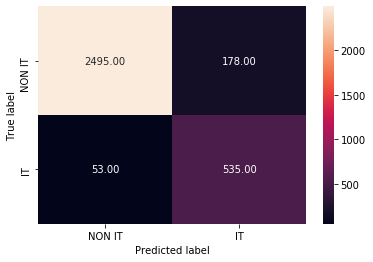

In [76]:
import seaborn as sns
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["NON IT", "IT"] , yticklabels = ["NON IT", "IT"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [77]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( X_train_dtm ) )

In [78]:
predict_proba_df.columns= ['IT', 'NON_IT']

In [79]:
predict_proba_df.head()

,IT,NON_IT
0,0.052441,0.947559
1,0.052441,0.947559
2,0.052441,0.947559
3,0.052441,0.947559
4,0.940343,0.059657


In [80]:
metrics.roc_auc_score(y_train,predict_proba_df.NON_IT )

0.8905310404499244

In [81]:
auc_score = metrics.roc_auc_score( y_train, predict_proba_df.NON_IT  )
round( float( auc_score ), 2 )

0.89

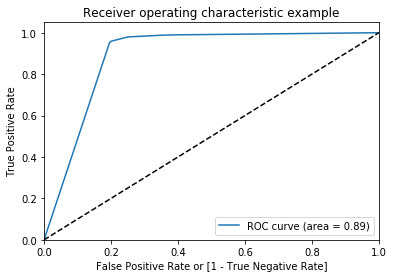

In [82]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( y_train,
                                     predict_proba_df.NON_IT,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [83]:
train_gini = 2*metrics.roc_auc_score(y_train, clf_tree.predict(X_train_dtm)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(y_test, clf_tree.predict(X_test_dtm)) - 1

print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.7299755307403673
The Gini Index for the model built on the Test Data is :  0.7295500031925595


In [84]:
train_auc = metrics.roc_auc_score(y_train, clf_tree.predict(X_train_dtm))
test_auc = metrics.roc_auc_score(y_test, clf_tree.predict(X_test_dtm))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The AUC for the model built on the Train Data is :  0.8649877653701836
The AUC for the model built on the Test Data is :  0.8647750015962797


In [85]:
X_train_tokens = vect.get_feature_names()

In [86]:
X_train_tokens

['aaa france',
 'aaa france foundation',
 'aarhus convention',
 'abandoned child',
 'abandoned child childrens',
 'abandoned child race',
 'abekchya clearly',
 'abekchya clearly application',
 'able across',
 'able across boundary',
 'able autonomously',
 'able compare',
 'able compare advise',
 'able demonstrate',
 'able handle',
 'able independently',
 'able instrucitons',
 'able instrucitons preferred',
 'able limited',
 'able limited supervision',
 'able maintain',
 'able manage',
 'able meet',
 'able member',
 'able member independently',
 'able move',
 'able move quickly',
 'able obtain',
 'able perform',
 'able pressure',
 'able pressure personal',
 'able respond',
 'able respond applicant',
 'able respond changing',
 'able travel',
 'able westernstyle',
 'able westernstyle environment',
 'abovelisted requirement',
 'abovelisted requirement confident',
 'abovelisted requirement send',
 'abovementioned document',
 'abovementioned document submitted',
 'abovementioned field',
 'ab

### Lemmatization

In [87]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
   # text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize(pos='v') for word in words]

In [88]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

Features Train:  21865
Features Test:  21865


In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kunnu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [90]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kunnu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Extension of Stop words

In [91]:
freq = pd.Series(' '.join(Online_job_Token['col_all']).split()).value_counts()[:50]
freq

application       58515
skill             49860
project           38540
development       36720
language          31700
opportunity       29561
management        27111
year              22796
procedure         22205
software          21140
responsibility    20789
service           20761
system            20008
candidate         19730
report            19606
activity          18626
yerevan           18158
deadline          17315
support           16963
design            16929
financial         16920
program           16479
position          16409
qualification     16130
business          16082
announcement      16009
technical         15825
information       15747
follow            15656
strong            15049
field             14890
clearly           14836
career            14642
customer          14640
manager           14531
available         14397
russian           14134
post              13823
place             13811
least             13689
description       13684
location        

In [92]:
stop.extend(('knowledge',
'experience',
'job',
'skills',
'work',
'applicaton',
'ability',
'armenia',
'please',
'website',
'mention',
'the',
'english',
'wwwcareercenteram',
'company',
'team',
'excellent',
'good',
'armenian',
'required',
'organization',
'date',
'to',
'responsible',
'office',
'years',
'communication',
'yeveran',
'time',
'ensure',
'provide',
'letter',
'develop',
'related',
'activities',
'center',
'languages',
'responsibilites',
'degree',
'candidates',
'title'))

In [93]:
vect = TfidfVectorizer(analyzer=split_into_lemmas, ngram_range=(2,3), min_df=5, max_features=1200, stop_words='english')
tokenize_test1(vect)

Features:  1200
Train Accuracy:  0.9145281668541049
Test Accuracy:  0.9172033118675254


##  Term Frequency-Inverse Document Frequency (TF-IDF)

In [99]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(analyzer=split_into_lemmas,min_df=5,stop_words='english')
dtm = vect.fit_transform(Online_job_Token.JobDescription5)
features = vect.get_feature_names()
dtm.shape

(13042, 3838)

In [100]:
len(vect.get_feature_names())

3838

In [101]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names()).head()

,a,aarhus,ab,abilities,ability,able,about,abovementioned,abovian,abovyan,...,yerevan,yes,yet,you,young,youth,zeppelin,zone,zte,zvartnots
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
